# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [4]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x2738F2BEC40

In [5]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, shuffle=True)

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [7]:
def analytical_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.pinv(X.T @ X) @ X.T @ y 

### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [8]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [9]:
def compute_cost(X, y, w):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ w - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [10]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.zeros(X.shape[1])

    costs = np.zeros(iterations)

    for i in range(iterations):
        w -= learning_rate/m *(X.T @ ((X @ w) - y))
        costs[i] = compute_cost(X, y, w)

    return w, costs

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [11]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    m,n = X.shape

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.zeros(X.shape[1])

    costs = np.zeros(iterations)

    for i in range(iterations):
        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = np.random.randint(0, X.shape[0]-1)
    
        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        w -= learning_rate * (np.dot(X[j], w) - y[j]) * X[j]
        costs[i] = compute_cost(X, y, w)

    return w, costs

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания используйте функцию `predict`.


##### **План**

##### 1 - находим веса одним из методов

##### 2 - применяем функцию **prediction** для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

##### 3 - вычисляем значение метрики $R^2$

In [12]:
%time weights_an = analytical_solution(X,y)

CPU times: total: 188 ms
Wall time: 13.6 ms


In [13]:
%time weights_GD, costsGD = gradient_descent(Xtrain, ytrain, 0.01, 10000)

CPU times: total: 17.2 s
Wall time: 7.55 s


In [14]:
%time weights_SGD, costsSGD = stochastic_gradient_descent(Xtrain, ytrain, 0.01, 10000)

CPU times: total: 6.95 s
Wall time: 3.38 s


In [15]:
Xtest = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))

## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [16]:
# your code for GD here
errorAN = r2_score(ytest, Xtest@weights_an)
errorGD = r2_score(ytest, Xtest@weights_GD)
errorSGD = r2_score(ytest, Xtest@weights_SGD)
print(errorAN, errorGD, errorSGD)

0.755637128880569 0.7555725849792186 0.7284059441936381


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

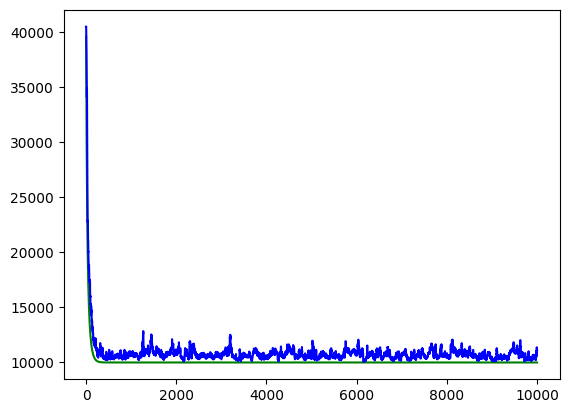

In [17]:
plt.plot(np.linspace(1,10000, num=10000), costsGD, c='green')
plt.plot(np.linspace(1,10000, num=10000), costsSGD,  c='blue')

## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [18]:
data = fetch_california_housing(as_frame=True)

X1 = data.data
y1 = data.target

Разобъем данные на трейн и тест

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

lr = LinearRegression()
sgd = SGDRegressor()

lr.fit(X_train, y_train)
sgd.fit(X_train, y_train)

predLR = lr.predict(X_test)
predSGD = sgd.predict(X_test)

errorLR = r2_score(y_test, predLR)
errorSGD = r2_score(y_test, predSGD)

## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [21]:
print(errorLR, errorSGD)

0.6078944086580229 -4.018690190526216e+29


## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.